In [58]:
import time
import numpy as np
np.random.seed(1)
import pandas as pd
import json
import matplotlib.pyplot as plt

In [59]:
import boto3
import s3fs
import sagemaker
from sagemaker import get_execution_role

In [60]:
bucket = "deepar-with-feature"  # replace with an existing bucket if needed
prefix = 'deepar-erp-notebook'    # prefix used for all data stored within the bucket


sagemaker_session = sagemaker.Session()
role = get_execution_role()


s3_data_path = "{}/{}/data".format(bucket, prefix)
s3_output_path = "{}/{}/output".format(bucket, prefix)

In [61]:
from sagemaker.amazon.amazon_estimator import get_image_uri
image_name = get_image_uri(boto3.Session().region_name, 'forecasting-deepar')

In [321]:
freq = '1D'
prediction_length = 96
context_length = 144


In [322]:
data = pd.read_csv("testing.csv", index_col=0, parse_dates=True, decimal=',')

In [323]:
len(data)


16938

In [324]:
a = data.loc["2014-01-02":"2019-01-12"]["ASPFWR5"]
a = a.asfreq('1D')
train_data = a.fillna(method='ffill').fillna(method='bfill')
train_data = [float(i) for i in train_data]
index = pd.to_datetime(a.index)
# pd.DatetimeIndex(start=t0, freq=freq, periods=data_length)
time_series = pd.Series(data=train_data, index=a.index)

In [325]:
len(time_series)

1836

In [326]:
time_series[0]

0.00391656456557865

In [327]:
t0 = '2014-01-02 00:00:00'
data_length = len(a)
num_ts = 1

In [328]:
a.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11',
               ...
               '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11'],
              dtype='datetime64[ns]', name='DATE', length=1836, freq='D')

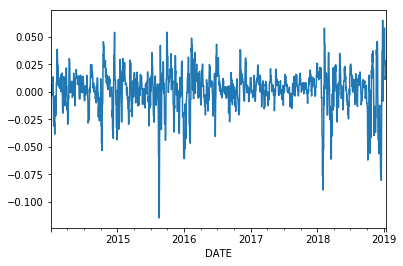

In [329]:
time_series.plot()
plt.show()

In [330]:
time_series_training = time_series

In [331]:
prediction_length

96

In [332]:
time_series_training

DATE
2014-01-02    0.003917
2014-01-03    0.006800
2014-01-04    0.006800
2014-01-05    0.006800
2014-01-06   -0.003693
2014-01-07    0.001023
2014-01-08    0.006181
2014-01-09    0.004227
2014-01-10   -0.002731
2014-01-11   -0.002731
2014-01-12   -0.002731
2014-01-13    0.013600
2014-01-14    0.003414
2014-01-15   -0.010188
2014-01-16   -0.030453
2014-01-17   -0.031145
2014-01-18   -0.031145
2014-01-19   -0.031145
2014-01-20   -0.031145
2014-01-21   -0.028144
2014-01-22   -0.038446
2014-01-23   -0.019675
2014-01-24   -0.003983
2014-01-25   -0.003983
2014-01-26   -0.003983
2014-01-27   -0.021814
2014-01-28   -0.020771
2014-01-29   -0.012374
2014-01-30   -0.009818
2014-01-31    0.008377
                ...   
2018-12-13   -0.071505
2018-12-14   -0.073448
2018-12-15   -0.073448
2018-12-16   -0.073448
2018-12-17   -0.080414
2018-12-18   -0.030030
2018-12-19   -0.007293
2018-12-20    0.007828
2018-12-21    0.037126
2018-12-22    0.037126
2018-12-23    0.037126
2018-12-24    0.064944
2018-1

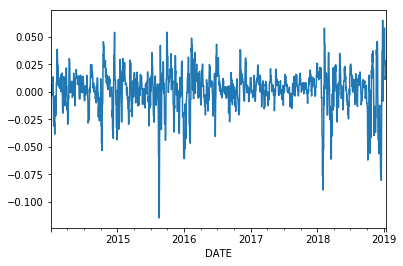

In [333]:
time_series_training.plot()

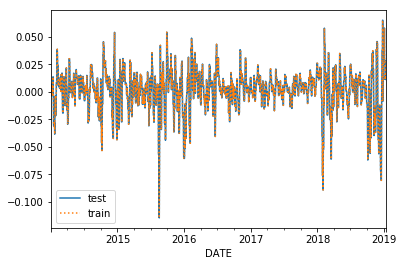

In [334]:
time_series.plot(label='test')
time_series_training.plot(label='train', ls=':')
plt.legend()
plt.show()

In [335]:
time_series_training[0]

0.00391656456557865

In [336]:
e = data.loc["2019-01-12":"2019-04-18"]["ASPFWR5"]
e = e.asfreq('1D')
eval_data = e.fillna(method='ffill').fillna(method='bfill')
eval_data = [float(i) for i in eval_data]
eval_index = pd.to_datetime(e.index)
# pd.DatetimeIndex(start=t0, freq=freq, periods=data_length)
eval_time_series = pd.Series(data=eval_data, index=e.index)

In [337]:
eval_time_series

DATE
2019-01-14    0.020530
2019-01-15    0.011221
2019-01-16    0.009334
2019-01-17    0.010201
2019-01-18   -0.010651
2019-01-19   -0.010651
2019-01-20   -0.010651
2019-01-21   -0.010651
2019-01-22    0.001624
2019-01-23    0.015241
2019-01-24    0.023455
2019-01-25    0.015511
2019-01-26    0.015511
2019-01-27    0.015511
2019-01-28    0.030152
2019-01-29    0.035664
2019-01-30    0.018639
2019-01-31    0.000319
2019-02-01    0.001059
2019-02-02    0.001059
2019-02-03    0.001059
2019-02-04   -0.005397
2019-02-05    0.003197
2019-02-06    0.007757
2019-02-07    0.015114
2019-02-08    0.024731
2019-02-09    0.024731
2019-02-10    0.024731
2019-02-11    0.025905
2019-02-12    0.015141
                ...   
2019-03-20   -0.007240
2019-03-21   -0.014688
2019-03-22    0.011032
2019-03-23    0.011032
2019-03-24    0.011032
2019-03-25    0.023574
2019-03-26    0.016637
2019-03-27    0.023451
2019-03-28    0.022317
2019-03-29    0.020859
2019-03-30    0.020859
2019-03-31    0.020859
2019-0

In [338]:
feature_list = data.columns.tolist()
feature_list.remove("ASPFWR5")

features_training = []
f = data.loc["2009-01-02":"2019-03-01"]
for feat in feature_list:
    f_series =  pd.Series(data=f[feat], index=a.index)
    f_series = f_series.fillna(method='ffill').fillna(method='bfill')
    f_series = [float(i) for i in f_series]
    features_training.append(f_series)

features_eval = []
g = data.loc["2019-03-01":"2019-04-18"]
for feat in feature_list:
    g_series =  pd.Series(data=g[feat], index=eval_time_series.index)
    g_series = g_series.fillna(method='ffill').fillna(method='bfill')
    g_series = [float(i) for i in g_series]
    features_eval.append(g_series)
  
# print(features_training)
print(len(features_training[0]))


1836


In [339]:
def series_to_obj(ts, dynamic_feat, cat=None):
    obj = {"start": str(ts.index[0]), "target": ts.tolist(), "dynamic_feat": dynamic_feat}
    print(obj)
    if cat is not None:
        obj["cat"] = cat
    return obj

def series_to_jsonline(ts, dynamic_feat, cat=None):
    return json.dumps(series_to_obj(ts, dynamic_feat, cat))

In [340]:
encoding = "utf-8"
s3filesystem = s3fs.S3FileSystem()

with s3filesystem.open(s3_data_path + "/train/train.json", 'wb') as fp:
    fp.write(series_to_jsonline(time_series, features_training).encode(encoding))
    fp.write('\n'.encode(encoding))

with s3filesystem.open(s3_data_path + "/test/test.json", 'wb') as fp:
    fp.write(series_to_jsonline(eval_time_series, features_eval).encode(encoding))
    fp.write('\n'.encode(encoding))

{'start': '2014-01-02 00:00:00', 'target': [0.00391656456557865, 0.00679959716636802, 0.00679959716636802, 0.00679959716636802, -0.00369267322075284, 0.00102314880917753, 0.00618058302218701, 0.00422677709949353, -0.00273060240627451, -0.00273060240627451, -0.00273060240627451, 0.0136004848594351, 0.00341363035419337, -0.0101880834921792, -0.0304533565602512, -0.0311453104294245, -0.0311453104294245, -0.0311453104294245, -0.0311453104294245, -0.0281437742272655, -0.0384463711078102, -0.019674546574288, -0.00398323806350954, -0.00398323806350954, -0.00398323806350954, -0.0218141469870262, -0.0207709593756068, -0.012374365999387, -0.00981784309906947, 0.00837722486925942, 0.00837722486925942, 0.00837722486925942, 0.0329738497021743, 0.0368773293589937, 0.0386265712093965, 0.0306756837603382, 0.0238607484582437, 0.0238607484582437, 0.0238607484582437, 0.0232217476572549, 0.00569313490028713, 0.0110817044175092, 0.00478904398363186, 0.00481437895608141, 0.00481437895608141, 0.0048143789560

In [341]:
estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=image_name,
    role=role,
    train_instance_count=1,
    train_instance_type='ml.c4.xlarge',
    base_job_name='deepar-erp-notebook',
    output_path="s3://" + s3_output_path
)

In [342]:
hyperparameters = {
    "time_freq": freq,
    "context_length": str(context_length),
    "prediction_length": str(prediction_length),
    "num_cells": "40",
    "num_layers": "3",
    "likelihood": "gaussian",
    "epochs": "20",
    "mini_batch_size": "64",
    "learning_rate": "0.001",
    "dropout_rate": "0.05",
    "early_stopping_patience": "10"
}

In [343]:
estimator.set_hyperparameters(**hyperparameters)


In [344]:
data_channels = {
    "train": "s3://{}/train/".format(s3_data_path),
    "test": "s3://{}/test/".format(s3_data_path)
}

estimator.fit(inputs=data_channels)

2020-06-17 04:47:28 Starting - Starting the training job...
2020-06-17 04:47:30 Starting - Launching requested ML instances......
2020-06-17 04:48:38 Starting - Preparing the instances for training...
2020-06-17 04:49:21 Downloading - Downloading input data
2020-06-17 04:49:21 Training - Downloading the training image....Arguments: train
[06/17/2020 04:50:05 INFO 139752456705856] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[06/17/2020 04:50:05 IN

[06/17/2020 04:50:37 INFO 139752456705856] Epoch[2] Batch[10] avg_epoch_loss=-2.616466
[06/17/2020 04:50:37 INFO 139752456705856] #quality_metric: host=algo-1, epoch=2, batch=10 train loss <loss>=-2.62629880905
[06/17/2020 04:50:37 INFO 139752456705856] Epoch[2] Batch [10]#011Speed: 135.83 samples/sec#011loss=-2.626299
[06/17/2020 04:50:37 INFO 139752456705856] processed a total of 673 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 9809.953927993774, "sum": 9809.953927993774, "min": 9809.953927993774}}, "EndTime": 1592369437.456242, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1592369427.646229}

[06/17/2020 04:50:37 INFO 139752456705856] #throughput_metric: host=algo-1, train throughput=68.603046091 records/second
[06/17/2020 04:50:37 INFO 139752456705856] #progress_metric: host=algo-1, completed 15 % of epochs
[06/17/2020 04:50:37 INFO 139752456705856] #quality_metric: host=algo-1, epoch=2, train loss <loss>=-2.

[06/17/2020 04:51:25 INFO 139752456705856] Epoch[7] Batch[10] avg_epoch_loss=-2.683024
[06/17/2020 04:51:25 INFO 139752456705856] #quality_metric: host=algo-1, epoch=7, batch=10 train loss <loss>=-2.72128357887
[06/17/2020 04:51:25 INFO 139752456705856] Epoch[7] Batch [10]#011Speed: 134.80 samples/sec#011loss=-2.721284
[06/17/2020 04:51:25 INFO 139752456705856] processed a total of 669 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 9805.610179901123, "sum": 9805.610179901123, "min": 9805.610179901123}}, "EndTime": 1592369485.535675, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1592369475.729239}

[06/17/2020 04:51:25 INFO 139752456705856] #throughput_metric: host=algo-1, train throughput=68.2254774495 records/second
[06/17/2020 04:51:25 INFO 139752456705856] #progress_metric: host=algo-1, completed 40 % of epochs
[06/17/2020 04:51:25 INFO 139752456705856] #quality_metric: host=algo-1, epoch=7, train loss <loss>=-2

[06/17/2020 04:52:08 INFO 139752456705856] Epoch[12] Batch[0] avg_epoch_loss=-2.820399
[06/17/2020 04:52:08 INFO 139752456705856] #quality_metric: host=algo-1, epoch=12, batch=0 train loss <loss>=-2.82039928436
[06/17/2020 04:52:11 INFO 139752456705856] Epoch[12] Batch[5] avg_epoch_loss=-2.766069
[06/17/2020 04:52:11 INFO 139752456705856] #quality_metric: host=algo-1, epoch=12, batch=5 train loss <loss>=-2.76606929302
[06/17/2020 04:52:11 INFO 139752456705856] Epoch[12] Batch [5]#011Speed: 136.88 samples/sec#011loss=-2.766069
[06/17/2020 04:52:13 INFO 139752456705856] Epoch[12] Batch[10] avg_epoch_loss=-2.725569
[06/17/2020 04:52:13 INFO 139752456705856] #quality_metric: host=algo-1, epoch=12, batch=10 train loss <loss>=-2.67696862221
[06/17/2020 04:52:13 INFO 139752456705856] Epoch[12] Batch [10]#011Speed: 135.64 samples/sec#011loss=-2.676969
[06/17/2020 04:52:13 INFO 139752456705856] processed a total of 666 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 9762.75300

[06/17/2020 04:52:57 INFO 139752456705856] Epoch[17] Batch[0] avg_epoch_loss=-2.856675
[06/17/2020 04:52:57 INFO 139752456705856] #quality_metric: host=algo-1, epoch=17, batch=0 train loss <loss>=-2.85667490959
[06/17/2020 04:52:59 INFO 139752456705856] Epoch[17] Batch[5] avg_epoch_loss=-2.753225
[06/17/2020 04:52:59 INFO 139752456705856] #quality_metric: host=algo-1, epoch=17, batch=5 train loss <loss>=-2.75322544575
[06/17/2020 04:52:59 INFO 139752456705856] Epoch[17] Batch [5]#011Speed: 138.59 samples/sec#011loss=-2.753225
[06/17/2020 04:53:02 INFO 139752456705856] Epoch[17] Batch[10] avg_epoch_loss=-2.764053
[06/17/2020 04:53:02 INFO 139752456705856] #quality_metric: host=algo-1, epoch=17, batch=10 train loss <loss>=-2.77704539299
[06/17/2020 04:53:02 INFO 139752456705856] Epoch[17] Batch [10]#011Speed: 134.09 samples/sec#011loss=-2.777045
[06/17/2020 04:53:02 INFO 139752456705856] processed a total of 675 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 9732.42497

Training seconds: 257
Billable seconds: 257


In [345]:
estimator.latest_training_job.name

'deepar-erp-notebook-2020-06-17-04-47-28-595'

In [346]:
job_name = estimator.latest_training_job.name

endpoint_name = sagemaker_session.endpoint_from_job(
    job_name=job_name,
    initial_instance_count=1,
    instance_type='ml.c4.xlarge',
    deployment_image=image_name,
    role=role
)

---------------!

In [347]:
class DeepARPredictor(sagemaker.predictor.RealTimePredictor):

    def set_prediction_parameters(self, freq, prediction_length):
        """Set the time frequency and prediction length parameters. This method **must** be called
        before being able to use `predict`.
        
        Parameters:
        freq -- string indicating the time frequency
        prediction_length -- integer, number of predicted time points
        
        Return value: none.
        """
        self.freq = freq
        self.prediction_length = prediction_length
        
    def predict(self, ts, dynamic_feat, cat=None, encoding="utf-8", num_samples=800, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`, each with the (optional)
        corresponding category listed in `cat`.
        
        Parameters:
        ts -- list of `pandas.Series` objects, the time series to predict
        cat -- list of integers (default: None)
        encoding -- string, encoding to use for the request (default: "utf-8")
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])
        
        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_times = ts.index[-1]+1
        req = self.__encode_request(ts, dynamic_feat, cat, encoding, num_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, prediction_times, encoding)
    
    def __encode_request(self, ts, dynamic_feat, cat, encoding, num_samples, quantiles):
        instances = [series_to_obj(ts, dynamic_feat, cat if cat else None)]
        configuration = {"num_samples": num_samples, "output_types": ["quantiles"], "quantiles": quantiles}
        http_request_data = {"instances": instances, "configuration": configuration}
        print(http_request_data)
        return json.dumps(http_request_data).encode(encoding)
    
    def __decode_response(self, response, prediction_times, encoding):
        response_data = json.loads(response.decode(encoding))
        list_of_df = []
        prediction_index = pd.DatetimeIndex(start=prediction_times, freq=self.freq, periods=self.prediction_length)
        list_of_df.append(pd.DataFrame(data=response_data['predictions'][0]['quantiles'], index=prediction_index))
        return list_of_df

In [348]:
predictor = DeepARPredictor(
    endpoint=endpoint_name,
    sagemaker_session=sagemaker_session,
    content_type="application/json"
)
predictor.set_prediction_parameters(freq, prediction_length)


In [349]:
features_prediction = []
p = data.loc["2014-01-02":"2019-04-18"]
p = p.asfreq('1D')
for feat in feature_list:
    p_series =  pd.Series(data=p[feat], index=p.index)
    p_series = p_series.fillna(method='ffill').fillna(method='bfill')
    p_series = [float(i) for i in p_series]
    features_prediction.append(p_series)
    
len(features_prediction[0])

1933

In [350]:
list_of_df = predictor.predict(time_series, features_prediction)
actual_data = time_series


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


{'start': '2014-01-02 00:00:00', 'target': [0.00391656456557865, 0.00679959716636802, 0.00679959716636802, 0.00679959716636802, -0.00369267322075284, 0.00102314880917753, 0.00618058302218701, 0.00422677709949353, -0.00273060240627451, -0.00273060240627451, -0.00273060240627451, 0.0136004848594351, 0.00341363035419337, -0.0101880834921792, -0.0304533565602512, -0.0311453104294245, -0.0311453104294245, -0.0311453104294245, -0.0311453104294245, -0.0281437742272655, -0.0384463711078102, -0.019674546574288, -0.00398323806350954, -0.00398323806350954, -0.00398323806350954, -0.0218141469870262, -0.0207709593756068, -0.012374365999387, -0.00981784309906947, 0.00837722486925942, 0.00837722486925942, 0.00837722486925942, 0.0329738497021743, 0.0368773293589937, 0.0386265712093965, 0.0306756837603382, 0.0238607484582437, 0.0238607484582437, 0.0238607484582437, 0.0232217476572549, 0.00569313490028713, 0.0110817044175092, 0.00478904398363186, 0.00481437895608141, 0.00481437895608141, 0.0048143789560

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:44: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


In [351]:
list_of_df

[                 0.1       0.9       0.5
 2019-01-12 -0.022796  0.028278  0.001955
 2019-01-13 -0.020422  0.026640  0.003097
 2019-01-14 -0.018602  0.030066  0.004457
 2019-01-15 -0.014930  0.027354  0.004839
 2019-01-16 -0.011223  0.025724  0.006796
 2019-01-17 -0.010424  0.021879  0.004950
 2019-01-18 -0.008444  0.025376  0.008993
 2019-01-19 -0.005474  0.025112  0.009255
 2019-01-20 -0.004994  0.024539  0.009391
 2019-01-21 -0.003505  0.024431  0.010207
 2019-01-22 -0.003729  0.027486  0.011101
 2019-01-23 -0.010151  0.029506  0.009567
 2019-01-24 -0.012003  0.032635  0.011024
 2019-01-25 -0.009211  0.030001  0.009468
 2019-01-26 -0.007585  0.029487  0.011253
 2019-01-27 -0.005063  0.029171  0.011083
 2019-01-28 -0.009604  0.028356  0.011444
 2019-01-29 -0.014327  0.031891  0.008222
 2019-01-30 -0.011086  0.029306  0.008243
 2019-01-31 -0.013900  0.032044  0.009547
 2019-02-01 -0.016549  0.030229  0.005856
 2019-02-02 -0.020195  0.034742  0.005583
 2019-02-03 -0.027104  0.039546  0

In [352]:
len(list_of_df[0])

96

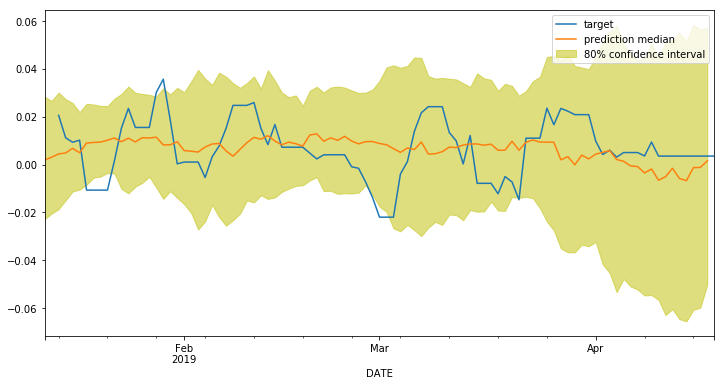

In [353]:
# No feature vector only time series. Prediction length = 48. Context length = 72
for k in range(len(list_of_df)):
    plt.figure(figsize=(12,6))
    eval_time_series.plot(label='target')
    p10 = list_of_df[k]['0.1']
    p90 = list_of_df[k]['0.9']
    plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
    list_of_df[k]['0.5'].plot(label='prediction median')
    plt.legend()
    plt.show()

In [ ]:
# No feature vector only time series. Prediction length = 326. Context length = 72
for k in range(len(list_of_df)):
    plt.figure(figsize=(12,6))
    eval_time_series.plot(label='target')
    p10 = list_of_df[0]['0.1']
    p90 = list_of_df[0]['0.9']
    plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
    list_of_df[0]['0.5'].plot(label='prediction median')
    plt.legend()
    plt.show()

In [ ]:
print("asd")

In [2]:
git remote -v

SyntaxError: invalid syntax (<ipython-input-2-56ce2853d7b6>, line 1)